In [1]:
#import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv("electric_vehicle_sales_by_state.csv")

In [3]:
#read the dataset
df.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [4]:
#checking data size
df.shape

(2445, 5)

We can see we have 2445 rows and 5 columns

In [6]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [7]:
#we can see date is in object so we can change it to date timeframe.
df['date']= pd.to_datetime(df['date'],errors='coerce')

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_44742/1694064339.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']= pd.to_datetime(df['date'],errors='coerce')


In [8]:
# Extract the year and create a new column
df['year'] = df['date'].dt.year

print(df)

           date                     state vehicle_category  \
0    2021-04-01                    Sikkim       2-Wheelers   
1    2021-04-01                    Sikkim       4-Wheelers   
2    2021-05-01                    Sikkim       2-Wheelers   
3    2021-05-01                    Sikkim       4-Wheelers   
4    2021-06-01                    Sikkim       2-Wheelers   
...         ...                       ...              ...   
2440 2024-03-01                   Mizoram       2-Wheelers   
2441 2024-03-01                DNH and DD       2-Wheelers   
2442 2024-03-01                   Manipur       2-Wheelers   
2443 2024-03-01  Andaman & Nicobar Island       2-Wheelers   
2444 2024-03-01                  Nagaland       2-Wheelers   

      electric_vehicles_sold  total_vehicles_sold  year  
0                          0                  398  2021  
1                          0                  361  2021  
2                          0                  113  2021  
3                      

In [9]:
#rechecking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    2445 non-null   datetime64[ns]
 1   state                   2445 non-null   object        
 2   vehicle_category        2445 non-null   object        
 3   electric_vehicles_sold  2445 non-null   int64         
 4   total_vehicles_sold     2445 non-null   int64         
 5   year                    2445 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(2)
memory usage: 105.2+ KB


We can see the date has changed from object to datetime.

In [11]:
#now, checking the columns of the dataset
df.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'year'],
      dtype='object')

In [12]:
#checking the null values of the dataset
df.isnull().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
year                      0
dtype: int64

We can see there are no null values in the dataset

In [14]:
#checking unique values of the datset
df.nunique()

date                        36
state                       35
vehicle_category             2
electric_vehicles_sold     921
total_vehicles_sold       2225
year                         4
dtype: int64

In [15]:
#now checking the statisctics of the dataset
df.describe()

,date,electric_vehicles_sold,total_vehicles_sold,year
count,2445,2445.000000,2445.000000,2445.000000
mean,2022-09-15 12:50:56.687116544,845.035174,23402.966053,2022.249080
min,2021-04-01 00:00:00,0.000000,1.000000,2021.000000
25%,2022-01-01 00:00:00,2.000000,1158.000000,2022.000000
50%,2022-09-01 00:00:00,54.000000,6098.000000,2022.000000
75%,2023-06-01 00:00:00,534.000000,29396.000000,2023.000000
max,2024-03-01 00:00:00,26668.000000,387983.000000,2024.000000
std,NaN,2185.167744,38353.266389,0.923265


In [16]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2445   │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ electric_vehicles_sold  │   0 │     0 │    845 │    2185 │     0 │     2 │    54 │   534 │  26670 │   ▇    │  │
│ │ total_vehicles_sold     │   0 │     0 │  23400 │   38350 │     1 │  1158 │  6098 │ 29400 │ 388000 │   ▇▁   │  │
│ │ year                    │   0 │     0 │   2022 │  0.9233 │  2021 │  2022 │  2022 │  2023 │   2024 │ ▆ ▇ ▇▂ │  │
│ └─────────────────────────┴─────┴───────┴────────┴─────────┴───────┴───────┴───────┴───────┴────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2021-04-01      │     2024-03-01      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ state                            │      0 │         0 │                        1.4 │                  3448 │  │
│ │ vehicle_category                 │      0 │         0 │                          1 │                  2445 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [17]:
#for i in df.columns:
    #print(df[i].value_counts())

In [18]:
#let's review the data further
mask= df.groupby("vehicle_category")
print(mask)

In [19]:
mask["total_vehicles_sold"].sum()

vehicle_category
2-Wheelers    46918768
4-Wheelers    10301484
Name: total_vehicles_sold, dtype: int64

Text(0.5, 1.0, 'Count of the total_vehicles_sold')

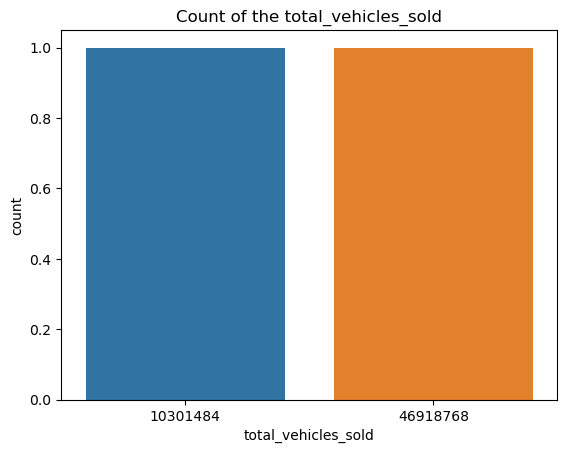

In [20]:
#let's visulaize the above details 
sns.countplot(df,x=mask["total_vehicles_sold"].sum())
plt.title("Count of the total_vehicles_sold")

we can interperet that for vehicle 2-Wheelers was sold maximum.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


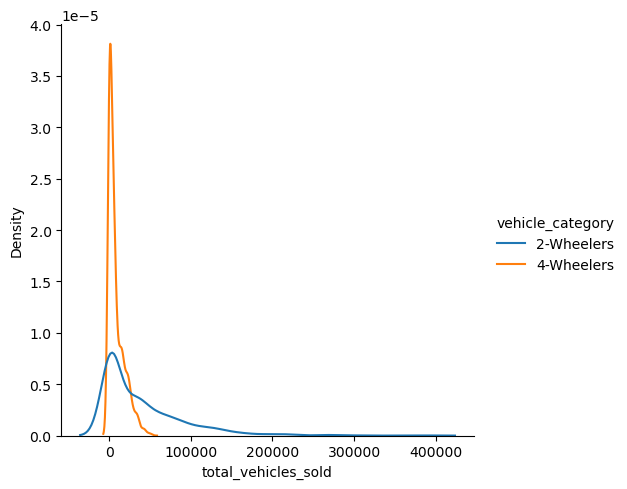

In [22]:
sns.displot(data=df, x="total_vehicles_sold", hue="vehicle_category", kind="kde")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


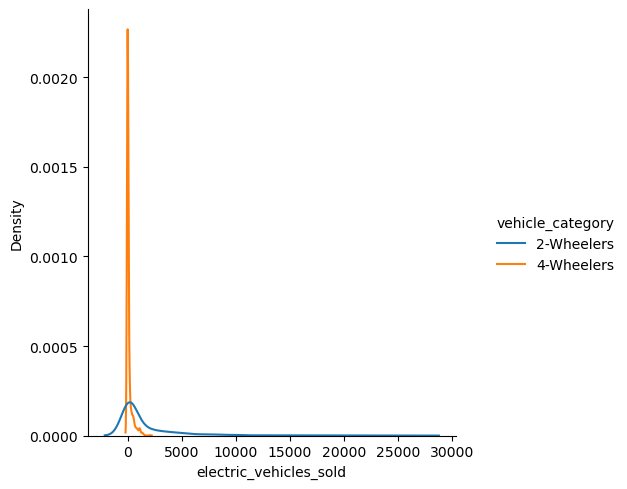

In [23]:
sns.displot(data=df, x="electric_vehicles_sold", hue="vehicle_category", kind="kde")

In [24]:
mask["electric_vehicles_sold"].sum()

vehicle_category
2-Wheelers    1913168
4-Wheelers     152943
Name: electric_vehicles_sold, dtype: int64

we can interperet that for vehicle 2-Wheelers was sold maximum.

Text(0.5, 1.0, 'Total_electric_vechiles_sold')

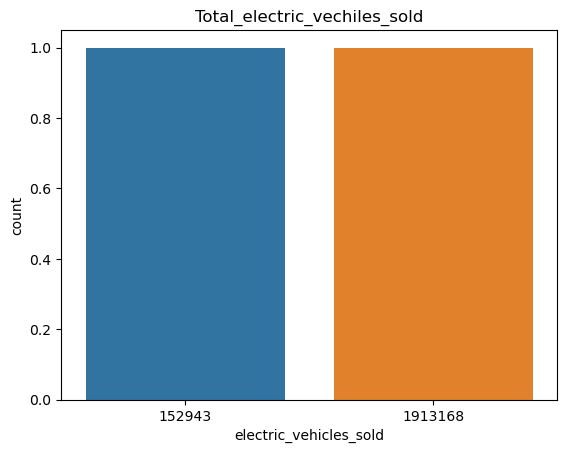

In [26]:
sns.countplot(data=df,x=mask["electric_vehicles_sold"].sum())
plt.title("Total_electric_vechiles_sold")

In [27]:
highest_state_with_ev_sale= df.groupby("state")["electric_vehicles_sold"].sum().sort_values(ascending=False)
print(highest_state_with_ev_sale)

state
Maharashtra                 396045
Karnataka                   312995
Tamil Nadu                  200062
Gujarat                     181389
Rajasthan                   150366
Kerala                      137060
Delhi                       107312
Uttar Pradesh                95203
Madhya Pradesh               78979
Odisha                       78267
Andhra Pradesh               77422
Chhattisgarh                 53804
Bihar                        31019
Haryana                      30797
West Bengal                  30560
Punjab                       23833
Goa                          19684
Jharkhand                    18461
Uttarakhand                  15127
Assam                         6418
Jammu and Kashmir             5971
Puducherry                    5536
Chandigarh                    5279
Himachal Pradesh              2595
Tripura                        562
DNH and DD                     355
Mizoram                        340
Manipur                        299
Meghalaya     

Text(0, 0.5, 'Electric Vehicles Sold')

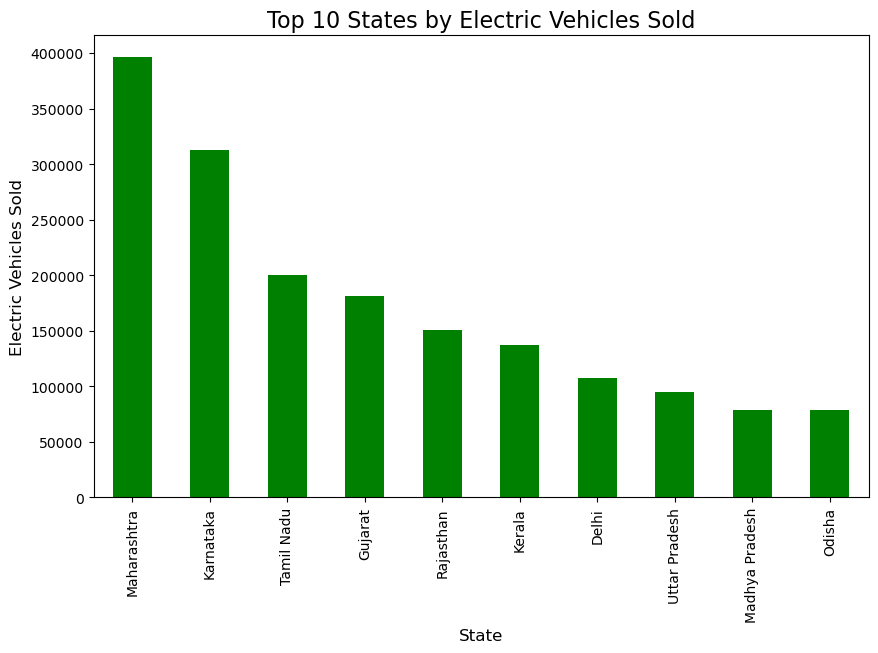

In [28]:
# Assuming 'highest_state_with_ev_sale' is already calculated
top_10_states = highest_state_with_ev_sale.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='green')

# Adding titles and labels
plt.title('Top 10 States by Electric Vehicles Sold', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Electric Vehicles Sold', fontsize=12)

In [29]:
highest_state_with_ev_sale.head()

state
Maharashtra    396045
Karnataka      312995
Tamil Nadu     200062
Gujarat        181389
Rajasthan      150366
Name: electric_vehicles_sold, dtype: int64

In [30]:
highest_state_with_sale= df.groupby("state")["total_vehicles_sold"].sum().sort_values(ascending=False)
print(highest_state_with_sale)

state
Uttar Pradesh               8127084
Maharashtra                 6101429
Tamil Nadu                  4652363
Gujarat                     4125551
Karnataka                   3994329
Madhya Pradesh              3498698
Rajasthan                   3307591
Bihar                       3048373
West Bengal                 2736176
Andhra Pradesh              2283871
Kerala                      2064677
Haryana                     1902768
Odisha                      1688794
Delhi                       1588436
Punjab                      1543962
Assam                       1403271
Jharkhand                   1364886
Chhattisgarh                1334989
Uttarakhand                  622707
Jammu and Kashmir            414553
Himachal Pradesh             325366
Goa                          199970
Puducherry                   150798
Chandigarh                   130628
Tripura                      125216
Manipur                      104513
Meghalaya                     90183
Arunachal Pradesh     

In [31]:
df.groupby("year")["electric_vehicles_sold"].sum().sort_values(ascending=False)

year
2023    936957
2022    669260
2024    316705
2021    143189
Name: electric_vehicles_sold, dtype: int64

In [32]:
df.groupby("year")["total_vehicles_sold"].sum().sort_values(ascending=False)

year
2023    20782055
2022    19030556
2021    12051170
2024     5356471
Name: total_vehicles_sold, dtype: int64

In [33]:
df_mask= pd.pivot_table(df,index="year", columns= "vehicle_category", values="electric_vehicles_sold" , aggfunc="sum")
print(df_mask)

vehicle_category  2-Wheelers  4-Wheelers
year                                    
2021                  132331       10858
2022                  631090       38170
2023                  856836       80121
2024                  292911       23794


<Axes: xlabel='vehicle_category', ylabel='year'>

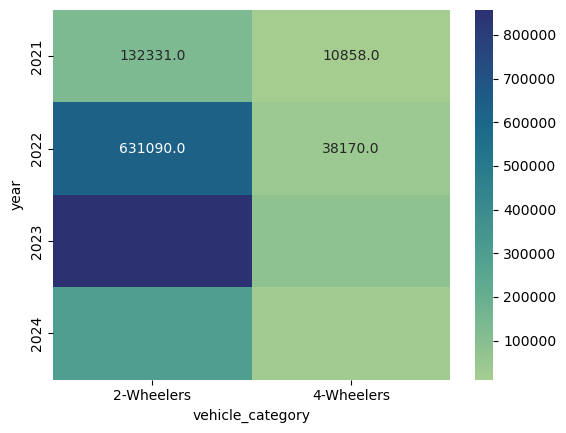

In [34]:
#let's draw the heatmap for the above pivot_table
sns.heatmap(df_mask, annot=True, fmt=".1f",cmap="crest")

In [35]:
df_mask1=pd.pivot_table(df,index="year", columns= "vehicle_category", values="total_vehicles_sold" , aggfunc="sum")
print(df_mask1)

vehicle_category  2-Wheelers  4-Wheelers
year                                    
2021                 9956997     2094173
2022                15576845     3453711
2023                17029004     3753051
2024                 4355922     1000549


<Axes: xlabel='vehicle_category', ylabel='year'>

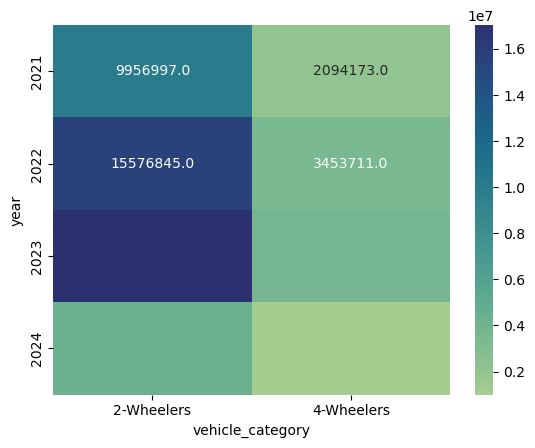

In [36]:
sns.heatmap(df_mask1, annot=True,fmt=".1f",cmap="crest")

In [37]:
df_mask2= pd.pivot_table(df,index="state", columns= "vehicle_category", values="total_vehicles_sold" , aggfunc="sum")
print(df_mask2)

vehicle_category          2-Wheelers  4-Wheelers
state                                           
Andaman & Nicobar                483         177
Andaman & Nicobar Island       13503        4722
Andhra Pradesh               2018842      265029
Arunachal Pradesh              39655       31892
Assam                        1156601      246670
Bihar                        2836853      211520
Chandigarh                     60010       70618
Chhattisgarh                 1181266      153723
DNH and DD                     29446       13951
Delhi                        1058093      530343
Goa                           140325       59645
Gujarat                      3181823      943728
Haryana                      1228554      674214
Himachal Pradesh              190694      134672
Jammu and Kashmir             250458      164095
Jharkhand                    1202744      162142
Karnataka                    3203736      790593
Kerala                       1498631      566046
Ladakh              

<Axes: xlabel='vehicle_category', ylabel='state'>

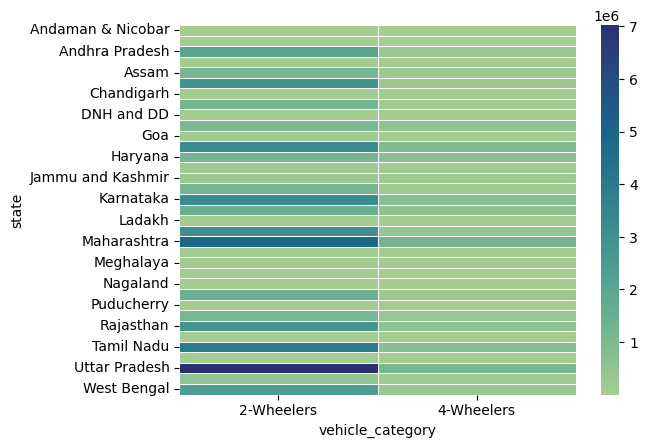

In [38]:
sns.heatmap(df_mask2, fmt=".1f",linewidth=.5,cmap="crest")

In [39]:
pd.pivot_table(df,index="state", columns= "vehicle_category", values="electric_vehicles_sold"  , aggfunc="sum")

vehicle_category,2-Wheelers,4-Wheelers
state,,
Andaman & Nicobar,2,0
Andaman & Nicobar Island,35,43
Andhra Pradesh,74099,3323
Arunachal Pradesh,4,29
Assam,5963,455
Bihar,30020,999
Chandigarh,3654,1625
Chhattisgarh,51889,1915
DNH and DD,281,74


In [40]:
df1= pd.read_csv("electric_vehicle_sales_by_makers.csv")

In [41]:
df1.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [43]:
#we can see date is in object so we can change it to date timeframe.
df1['date']= pd.to_datetime(df1['date'],errors='coerce')

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_44742/2620480713.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['date']= pd.to_datetime(df1['date'],errors='coerce')


In [44]:
#Extracting year from the df1
df1["year"]= (df["date"].dt.year)
df1

,date,vehicle_category,maker,electric_vehicles_sold,year
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2021
1,2022-04-01,2-Wheelers,OKAYA EV,0,2021
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2021
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2021
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2021
...,...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070,2022
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625,2022
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915,2022
814,2024-03-01,2-Wheelers,REVOLT,585,2022


In [45]:
from skimpy import skim
skim(df1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 816    │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 5      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean  ┃ sd       ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ electric_vehicles_sold   │   0 │     0 │  2532 │     4771 │     0 │    42 │   662 │  2636 │ 44630 │   ▇▁   │  │
│ │ year                     │   0 │     0 │  2022 │   0.8515 │  2021 │  2021 │  2022 │  2022 │  2024 │ ▇ ▅ ▃▁ │  │
│ └──────────────────────────┴─────┴───────┴───────┴──────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2021-04-01      │     2024-03-01      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ vehicle_category                 │      0 │         0 │                          1 │                   816 │  │
│ │ maker                            │      0 │         0 │                        1.8 │                  1428 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    816 non-null    datetime64[ns]
 1   vehicle_category        816 non-null    object        
 2   maker                   816 non-null    object        
 3   electric_vehicles_sold  816 non-null    int64         
 4   year                    816 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 28.8+ KB


In [47]:
df1.nunique()

date                       36
vehicle_category            2
maker                      26
electric_vehicles_sold    603
year                        4
dtype: int64

In [48]:
df1["maker"].value_counts()

maker
OLA ELECTRIC           36
Mahindra & Mahindra    36
OTHERS                 36
BAJAJ                  36
REVOLT                 36
TVS                    36
ATHER                  36
AMPERE                 36
HERO ELECTRIC          36
Hyundai Motor          36
OKINAWA                36
MG Motor               36
Tata Motors            36
Mercedes -Benz AG      36
KIA Motors             36
Volvo Auto India       36
BMW India              36
PCA Automobiles        36
BYD India              36
OKAYA EV               24
PURE EV                24
BEING                  24
JITENDRA               24
BGAUSS                 12
BATTRE ELECTRIC        12
KINETIC GREEN          12
Name: count, dtype: int64

In [49]:
df1.isnull().sum()

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
year                      0
dtype: int64

In [50]:
df2=pd.read_csv("dim_date.csv")

In [51]:
df2.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [52]:
df2.isnull().sum()

date           0
fiscal_year    0
quarter        0
dtype: int64

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


In [54]:
#we can see date is in object so we can change it to date timeframe.
df2['date']= pd.to_datetime(df2['date'],errors='coerce')

/var/folders/5y/fdpz56f55cb6jc5jsgbq17140000gn/T/ipykernel_44742/3489528276.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['date']= pd.to_datetime(df2['date'],errors='coerce')


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         36 non-null     datetime64[ns]
 1   fiscal_year  36 non-null     int64         
 2   quarter      36 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 996.0+ bytes


In [56]:
#let's find the ansswer of the given questions.

In [57]:
#List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 interms of the number of 2-wheelers sold.

In [58]:
df1.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold', 'year'], dtype='object')

In [59]:
filter_data = df1[(df1["year"].isin([2023, 2024])) & (df1["vehicle_category"] == "2-Wheelers")]

In [60]:
grouped_data= filter_data.groupby("maker")['electric_vehicles_sold'].sum().reset_index()

In [61]:
sorted_data= grouped_data.sort_values(by='electric_vehicles_sold', ascending= False)

In [62]:
sorted_data.head(3)

,maker,electric_vehicles_sold
11,OLA ELECTRIC,125575
15,TVS,63502
0,AMPERE,54069


(array([0, 1, 2]),
 [Text(0, 0, 'OLA ELECTRIC'), Text(1, 0, 'TVS'), Text(2, 0, 'AMPERE')])

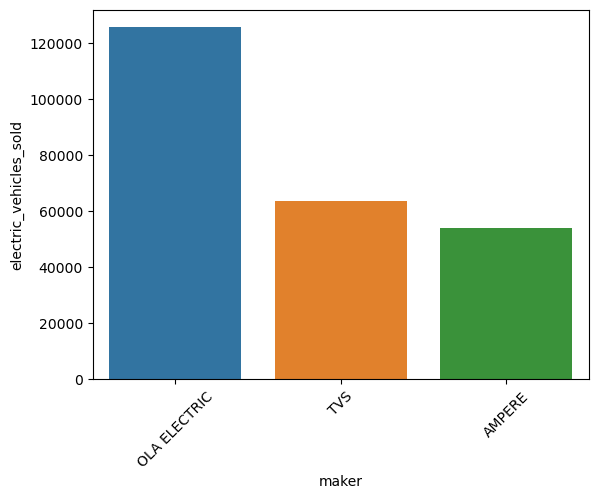

In [63]:
sns.barplot(data=sorted_data.head(3), x="maker", y="electric_vehicles_sold")
plt.xticks(rotation=45)

In [64]:
sorted_data.tail(3)

,maker,electric_vehicles_sold
7,JITENDRA,3033
3,BATTRE ELECTRIC,2116
8,KINETIC GREEN,2104


(array([0, 1, 2]),
 [Text(0, 0, 'JITENDRA'),
  Text(1, 0, 'BATTRE ELECTRIC'),
  Text(2, 0, 'KINETIC GREEN')])

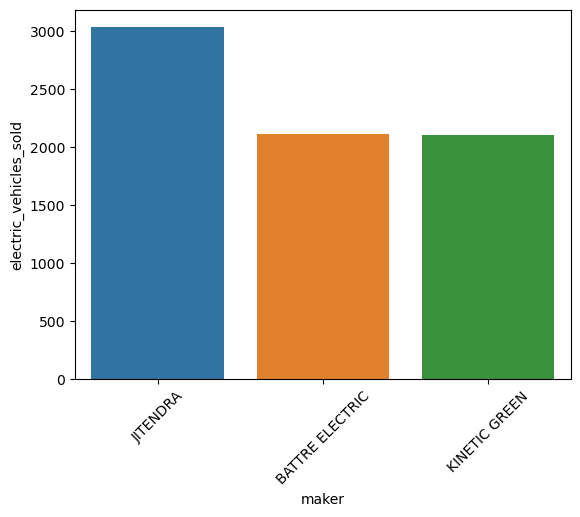

In [65]:
sns.barplot(data=sorted_data.tail(3), x="maker", y="electric_vehicles_sold")
plt.xticks(rotation=45)

In [66]:
#Q2 Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.

In [67]:
df.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'year'],
      dtype='object')

In [68]:
df['penetration_rate'] = df["electric_vehicles_sold"] / df[("total_vehicles_sold")] * 100

In [69]:
df_2024_2w= df[(df["year"] ==2024) & (df["vehicle_category"] == "2-Wheelers")]

In [70]:
grouped_data_2w = df_2024_2w.groupby("state")['penetration_rate'].sum().reset_index()

In [71]:
sorted_data_2w= grouped_data_2w.sort_values(by="penetration_rate", ascending= False)

In [72]:
sorted_data_2w.head(5)

,state,penetration_rate
10,Goa,71.958678
17,Kerala,48.799677
16,Karnataka,40.659867
18,Ladakh,37.837838
20,Maharashtra,37.239936


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Goa'),
  Text(1, 0, 'Kerala'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Ladakh'),
  Text(4, 0, 'Maharashtra')])

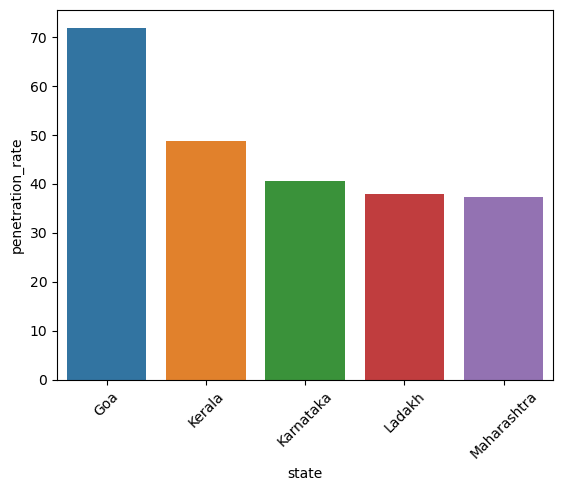

In [73]:
sns.barplot(sorted_data_2w.head(), x="state", y="penetration_rate")
plt.xticks(rotation=45)

In [74]:
df_2024_4w= df[(df["year"]==2024) & (df["vehicle_category"]== "4-Wheelers")]

In [75]:
grouped_data_4w= df_2024_4w.groupby("state")["penetration_rate"].sum().reset_index()

In [76]:
sorted_data_4w = grouped_data_4w.sort_values(by="penetration_rate", ascending= False)

In [77]:
sorted_data_4w.head(5)

,state,penetration_rate
17,Kerala,459.450445
6,Chandigarh,21.774321
10,Goa,16.386138
9,Delhi,15.219717
16,Karnataka,12.769866


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Kerala'),
  Text(1, 0, 'Chandigarh'),
  Text(2, 0, 'Goa'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Karnataka')])

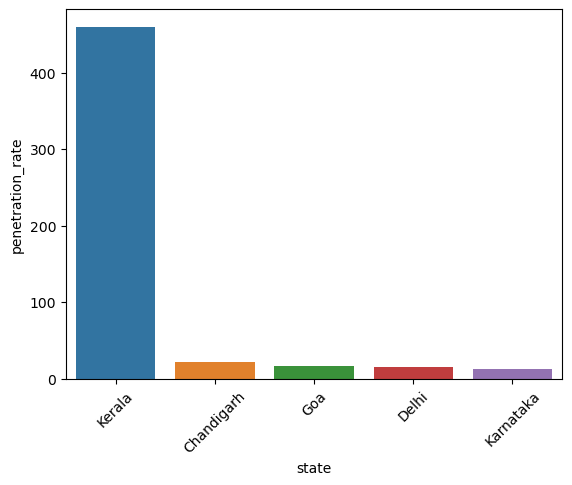

In [78]:
sns.barplot(data=sorted_data_4w.head(), x="state", y="penetration_rate")
plt.xticks(rotation=45)

In [79]:
#q3  List the states with negative penetration (decline) in EV sales from 2022 to 2024?

df_2022_sale = df[(df["year"]==2022)]

In [80]:
grouped_data_sale= df_2022_sale.groupby("state")["penetration_rate"].sum().reset_index()

In [81]:
sorted_data_sale_2022 = grouped_data_sale.sort_values(by="penetration_rate", ascending= False)

In [82]:
sorted_data_sale_2022.tail()

,state,penetration_rate
21,Meghalaya,2.570402
22,Mizoram,2.107291
23,Nagaland,0.645003
2,Arunachal Pradesh,0.213705
28,Sikkim,0.000000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Meghalaya'),
  Text(1, 0, 'Mizoram'),
  Text(2, 0, 'Nagaland'),
  Text(3, 0, 'Arunachal Pradesh'),
  Text(4, 0, 'Sikkim')])

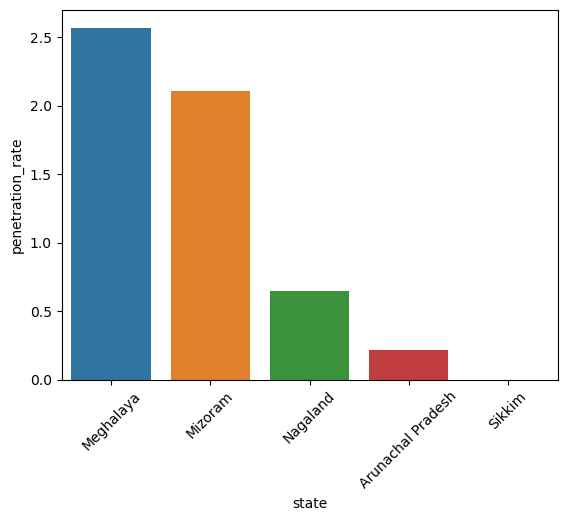

In [83]:
sns.barplot(data=sorted_data_sale_2022.tail(), x="state", y="penetration_rate")
plt.xticks(rotation=45)

In [84]:
df_2024_sale= df[(df["year"]==2024)]

In [85]:
grouped_data_sale= df_2024_sale.groupby("state")["penetration_rate"].sum().reset_index()

In [86]:
sorted_data_sale_2024 = grouped_data_sale.sort_values(by="penetration_rate", ascending=False)

In [87]:
sorted_data_sale_2024.tail()

,state,penetration_rate
1,Andaman & Nicobar Island,2.689907
3,Arunachal Pradesh,0.856239
0,Andaman & Nicobar,0.414079
24,Nagaland,0.291146
29,Sikkim,0.000000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Andaman & Nicobar Island'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Andaman & Nicobar'),
  Text(3, 0, 'Nagaland'),
  Text(4, 0, 'Sikkim')])

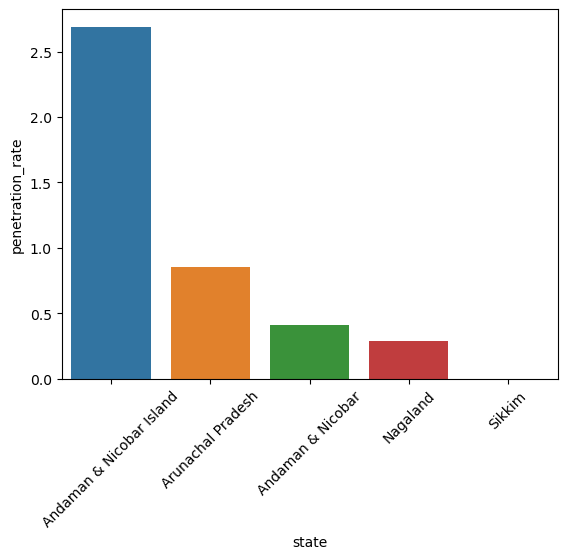

In [88]:
sns.barplot(data=sorted_data_sale_2024.tail(), x="state", y="penetration_rate")
plt.xticks(rotation=45)

In [89]:
#q4How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?

#filter the year for the 2024
ev_2024 = df[(df["year"]==2024)]

In [90]:
#filter the states now
# Compare EV sales and penetration rates for Delhi and Karnataka
delhi_data = ev_2024[ev_2024['state'] == 'Delhi']
karnataka_data = ev_2024[ev_2024['state'] == 'Karnataka']

print("Delhi EV Data for 2024:")
print(delhi_data)

print("\nKarnataka EV Data for 2024:")
print(karnataka_data)

Delhi EV Data for 2024:
           date  state vehicle_category  electric_vehicles_sold  \
1370 2024-01-01  Delhi       4-Wheelers                    1345   
1400 2024-02-01  Delhi       4-Wheelers                     596   
1425 2024-03-01  Delhi       4-Wheelers                     897   
2361 2024-01-01  Delhi       2-Wheelers                    3073   
2394 2024-02-01  Delhi       2-Wheelers                    2364   
2420 2024-03-01  Delhi       2-Wheelers                    5002   

      total_vehicles_sold  year  penetration_rate  
1370                21520  2024          6.250000  
1400                17898  2024          3.329981  
1425                15905  2024          5.639736  
2361                38413  2024          7.999896  
2394                30504  2024          7.749803  
2420                31599  2024         15.829615  

Karnataka EV Data for 2024:
           date      state vehicle_category  electric_vehicles_sold  \
1365 2024-01-01  Karnataka       4-Wheeler

In [91]:
# Additional analysis or comparison
sales_difference = delhi_data['electric_vehicles_sold'].values[0] - karnataka_data['electric_vehicles_sold'].values[0]
penetration_difference = delhi_data['penetration_rate'].values[0] - karnataka_data['penetration_rate'].values[0]

In [92]:
print(sales_difference)

265


In [93]:
print(round(penetration_difference,2))

2.74


In [94]:
#q5 What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?
df1.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold', 'year'], dtype='object')

In [95]:
df1['quarter'] = df1['date'].dt.to_period('Q')

In [96]:
df1.head()

,date,vehicle_category,maker,electric_vehicles_sold,year,quarter
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2021,2021Q2
1,2022-04-01,2-Wheelers,OKAYA EV,0,2021,2022Q2
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2021,2021Q2
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2021,2021Q2
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2021,2021Q3


In [97]:
filter_data_qa = df1[(df1["year"].isin([2022, 2024])) & (df1["vehicle_category"] == "4-Wheelers")]

In [98]:
grouped_data_qa = filter_data_qa.groupby("maker")["electric_vehicles_sold"].sum().reset_index()

In [99]:
sorted_data_qa= grouped_data_qa.sort_values(by="electric_vehicles_sold", ascending= False)

In [100]:
sorted_data_qa.head()

,maker,electric_vehicles_sold
8,Tata Motors,49292
5,Mahindra & Mahindra,16817
4,MG Motor,6241
1,BYD India,1482
2,Hyundai Motor,1033


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Tata Motors'),
  Text(1, 0, 'Mahindra & Mahindra'),
  Text(2, 0, 'MG Motor'),
  Text(3, 0, 'BYD India'),
  Text(4, 0, 'Hyundai Motor')])

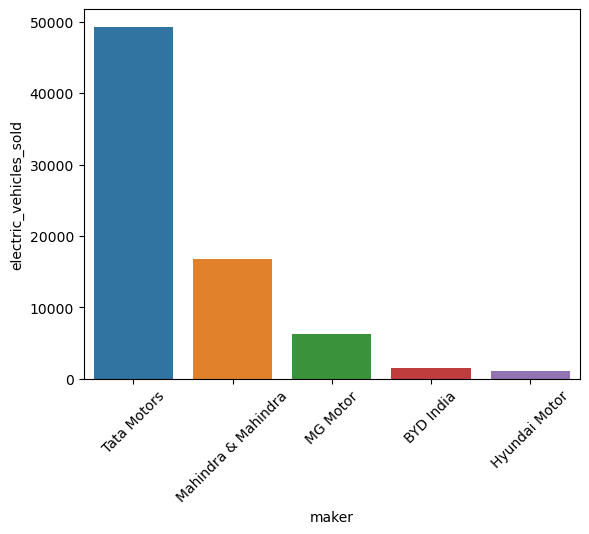

In [101]:
sns.barplot(data=sorted_data_qa.head(), x="maker", y="electric_vehicles_sold")
plt.xticks(rotation=45)

'''Q4-What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?'''

In [103]:
df1.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold', 'year',
       'quarter'],
      dtype='object')

In [104]:
#filter_data = df1[(df1["year"].isin([2023, 2024])) & (df1["vehicle_category"] == "2-Wheelers")]

In [105]:
filtered_data_df1= df1[(df1["year"].isin([2022,2024])) & (df1["vehicle_category"]== "4-Wheelers")]

In [106]:
grouped_data_df1 = filtered_data_df1.groupby(["maker","quarter"])["electric_vehicles_sold"].sum().reset_index()

In [107]:
sorted_data_df1 = grouped_data_df1.sort_values(by="electric_vehicles_sold", ascending= False)

In [108]:
sorted_data_df1.head()

,maker,quarter,electric_vehicles_sold
64,Tata Motors,2024Q1,17361
62,Tata Motors,2023Q1,9528
63,Tata Motors,2023Q4,9325
60,Tata Motors,2022Q1,5834
40,Mahindra & Mahindra,2023Q1,5243


In [109]:
sroted_wide = sorted_data_df1.pivot(index="quarter", columns="maker", values="electric_vehicles_sold")
sroted_wide.head()

maker,BMW India,BYD India,Hyundai Motor,KIA Motors,MG Motor,Mahindra & Mahindra,Mercedes -Benz AG,PCA Automobiles,Tata Motors,Volvo Auto India
quarter,,,,,,,,,,
2021Q2,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
2021Q3,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
2021Q4,0.0,1.0,17.0,0.0,217.0,1014.0,3.0,0.0,2988.0,0.0
2022Q1,7.0,32.0,26.0,NaN,153.0,1653.0,10.0,NaN,5834.0,4.0
2022Q2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='maker', ylabel='electric_vehicles_sold'>

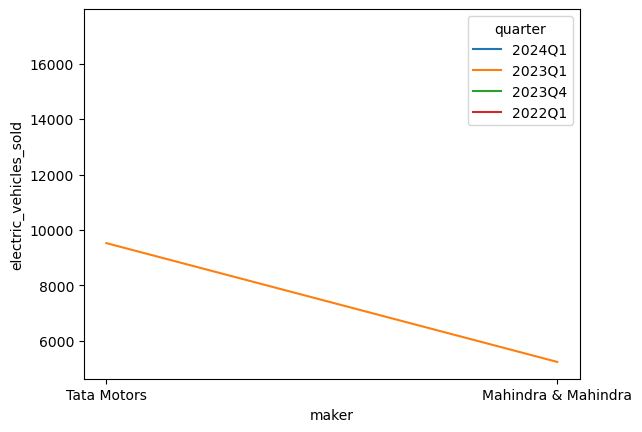

In [110]:
sns.lineplot(data=sorted_data_df1.head(), x="maker", y="electric_vehicles_sold", hue="quarter")

In [111]:
##List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [112]:
# Step 1: Filter data for 4-wheeler vehicles and the relevant years
filtered_df1_cagr = df1[(df1["year"].isin([2022,2024])) & (df1["vehicle_category"]== "4-Wheelers")]

In [113]:
# Step 2: Group by 'maker' and 'year', then sum the 'electric_vehicles_sold'
grouped_df1_cagr = filtered_df1_cagr.groupby(['maker', 'year'])['electric_vehicles_sold'].sum().unstack(fill_value=0)

In [114]:
# Step 3: Calculate CAGR for each maker
# Formula: ((End Value / Start Value) ** (1 / Number of Years)) - 1
grouped_df1_cagr['CAGR'] = ((grouped_df1_cagr[2024] / grouped_df1_cagr[2022].replace(0,1)) ** (1 / 2)) - 1

In [115]:
# Step 4: Sort by total sales in 2024 to get top 5 makers
top_5_makers = grouped_df1_cagr.sort_values(by=2024, ascending=False).head(5)

In [116]:
# Step 5: Display top 5 makers and their CAGR
top_5_makers[['CAGR']]

year,CAGR
maker,
BMW India,-1.0
BYD India,-1.0
Hyundai Motor,-1.0
KIA Motors,-1.0
MG Motor,-1.0


In [117]:
df.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'year', 'penetration_rate'],
      dtype='object')

In [118]:
#List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [119]:
filtered_df_cagr = df[(df["year"].isin([2022,2024]))]

In [120]:
# Step 2: Group by 'maker' and 'year', then sum the 'electric_vehicles_sold'
grouped_df_cagr = filtered_df_cagr.groupby(['state', 'year'])['total_vehicles_sold'].sum().unstack(fill_value=0)

In [121]:
grouped_df_cagr['CAGR'] = ((grouped_df_cagr[2024] / grouped_df_cagr[2022].replace(0,1)) ** (1 / 2)) - 1

In [122]:
top_10_states = grouped_df_cagr.sort_values(by='CAGR', ascending=False).head(10)

# Step 6: Display top 10 states and their CAGR
print("Top 10 States with Highest CAGR from 2022 to 2024:")
print(top_10_states[['CAGR']])

Top 10 States with Highest CAGR from 2022 to 2024:
year                    CAGR
state                       
Andaman & Nicobar  24.690465
Nagaland           -0.378149
Puducherry         -0.406331
Assam              -0.416486
Chhattisgarh       -0.426296
Haryana            -0.429612
Karnataka          -0.433611
Meghalaya          -0.436088
Tamil Nadu         -0.437902
Mizoram            -0.446766
